In [9]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")

USAmonthyearAc2 = pd.read_csv('queries_results/USA/USA monthyear ac2 count.csv', header = 0,sep=' *, *')
USAmonthyearAc2["Time"]=pd.to_datetime(USAmonthyearAc2['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')


/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [10]:
USAPOLmonthyearERC = pd.read_csv('queries_results/USA/USA_POL/USA-POL monthyear eventRC count SUMaTone AVGaTonne.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
USAPOLmonthyearERC["Time"]=pd.to_datetime(USAPOLmonthyearERC['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
eventcodes = pd.read_csv('cameo.csv', header = 0,dtype =str, sep=' *, *')
USAUSAmonthyearERC = USAPOLmonthyearERC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventRootCode',right_on='CAMEOEVENTCODE', how='left')

s = USAUSAmonthyearERC.groupby(["Time"]).agg({'Count':'sum'})
t = USAmonthyearAc2.groupby(["Time"]).agg({'Count':'sum'})
s['Count']=s['Count']/t['Count']
s['Country']='POL'

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
USAmonthyearERC = pd.read_csv('queries_results/USA/USA_RUS/USA-RUS monthyear eventRC count SUMaTone AVGaTonne.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
USAmonthyearERC["Time"]=pd.to_datetime(USAmonthyearERC['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
eventcodes = pd.read_csv('cameo.csv', header = 0,dtype =str, sep=' *, *')
USAmonthyearERC = USAmonthyearERC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventRootCode',right_on='CAMEOEVENTCODE', how='left')
u = USAmonthyearERC.groupby(["Time"]).agg({'Count':'sum'})
u['Count']=u['Count']/t['Count']
u['Country']='RUS'
s = s.append(u)

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
USAmonthyearERC = pd.read_csv('queries_results/USA/USA_DEU/USA-DEU monthyear eventRC count SUMaTone AVGaTonne.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
USAmonthyearERC["Time"]=pd.to_datetime(USAmonthyearERC['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
eventcodes = pd.read_csv('cameo.csv', header = 0,dtype =str, sep=' *, *')
USAmonthyearERC = USAmonthyearERC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventRootCode',right_on='CAMEOEVENTCODE', how='left')
u = USAmonthyearERC.groupby(["Time"]).agg({'Count':'sum'})
u['Count']=u['Count']/t['Count']
u['Country']='DEU'
s = s.append(u)

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


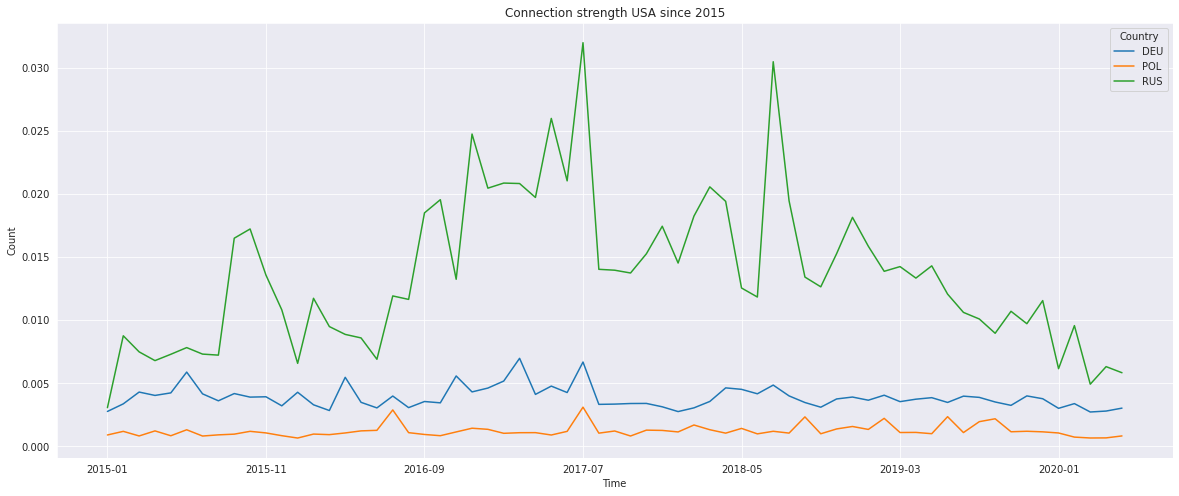

In [13]:
s = s.groupby(["Time","Country"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g
g.set(ylabel='Count')
g.set_title("Connection strength USA since 2015")
g.figure.set_size_inches(20,8)